# Module 3: Comprehensive Analysis - Univariate, Bivariate, Multivariate & Time Series Analysis
Name: Srinivasa Reddy Julakanti Registration Number: 21BDS0220

# Overview
This notebook covers a complete analysis of the dataset, including univariate, bivariate, multivariate analysis, and time series analysis. Each section is detailed with various visualizations and statistical techniques.

# 1. Data Cleaning and Handling Non-Numeric Values

In [24]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
data = pd.read_csv('bank_marketing_test.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Finding and Listing Non-Numeric Values

In [36]:
# 1. Finding and Listing Non-Numeric Values
print("="*50)
print("Step 1: Non-Numeric Values Analysis")
print("="*50)

# Identify non-numeric columns
non_numeric_count = data.select_dtypes(include=['object']).nunique()
print("\nNumber of unique non-numeric values in each column:")
print(non_numeric_count)

# Show unique values in categorical columns
non_numeric_values = data.select_dtypes(include=['object']).apply(lambda col: col.unique())
print("\nNon-numeric values in each column:")
print(non_numeric_values)


Step 1: Non-Numeric Values Analysis

Number of unique non-numeric values in each column:
job            12
marital         4
education       8
default         2
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

Non-numeric values in each column:
job            [services, blue-collar, unknown, technician, a...
marital                     [married, single, divorced, unknown]
education      [high.school, unknown, basic.6y, basic.4y, bas...
default                                            [no, unknown]
housing                                       [no, yes, unknown]
loan                                          [yes, no, unknown]
contact                                    [telephone, cellular]
month          [may, jun, jul, aug, oct, nov, dec, mar, apr, ...
day_of_week                            [mon, tue, wed, thu, fri]
poutcome                         [nonexistent, failure, success]
y             

In [37]:
# 2. Handling Missing Values and Data Cleaning
print("\n\n" + "="*50)
print("Step 2: Data Cleaning")
print("="*50)

# Clean categorical columns (replace 'unknown' with NaN)
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
for col in categorical_cols:
    data[col] = data[col].replace('unknown', pd.NA)

# Handle numerical columns
# Clean 'pdays' (999 typically indicates missing value in marketing data)
data['pdays'] = data['pdays'].replace(999, pd.NA)

# Fill missing values
data['pdays'] = data['pdays'].fillna(0)  # 0 days since last contact
data['default'] = data['default'].fillna(data['default'].mode()[0])  # Most common category

# Ensure positive values in relevant columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_cols:
    data[col] = data[col].apply(lambda x: x if x >= 0 else 0)

# Show updated data info
print("\nUpdated Data Information:")
print(data.info())




Step 2: Data Cleaning

Updated Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8237 entries, 2020-01-01 to 2042-07-20
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8237 non-null   int64  
 1   job             8177 non-null   object 
 2   marital         8221 non-null   object 
 3   education       7909 non-null   object 
 4   default         8237 non-null   object 
 5   housing         8037 non-null   object 
 6   loan            8037 non-null   object 
 7   contact         8237 non-null   object 
 8   month           8237 non-null   object 
 9   day_of_week     8237 non-null   object 
 10  duration        8237 non-null   int64  
 11  campaign        8237 non-null   int64  
 12  pdays           8237 non-null   int64  
 13  previous        8237 non-null   int64  
 14  poutcome        8237 non-null   object 
 15  emp.var.rate    8237 non-null   float64
 16  cons.pric

<ipython-input-37-b40a445d3687>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['pdays'] = data['pdays'].fillna(0)  # 0 days since last contact




Step 3: Distribution Visualization


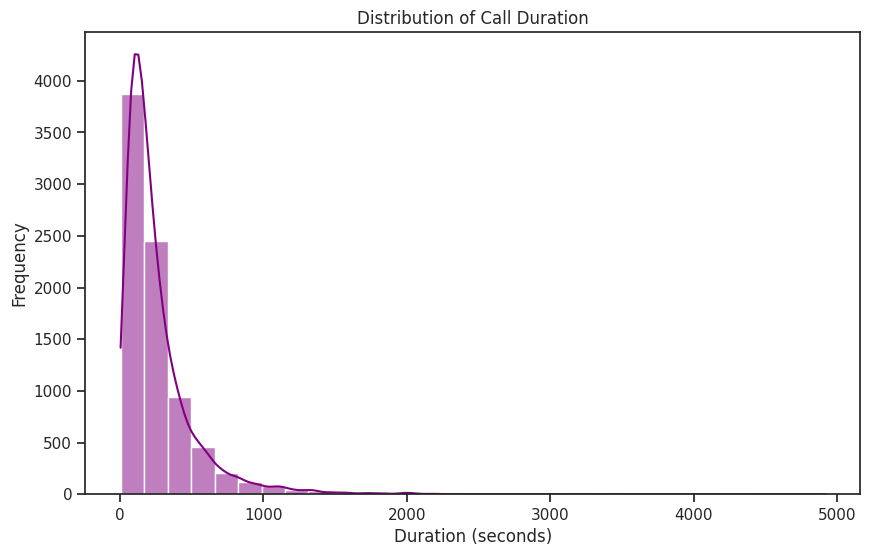

In [39]:
# 3. Distribution Visualization
print("\n\n" + "="*50)
print("Step 3: Distribution Visualization")
print("="*50)

plt.figure(figsize=(10, 6))
sns.histplot(data['duration'], bins=30, kde=True, color='purple')
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()



Step 4: Top Values Analysis


<ipython-input-40-18d03f0ba6f2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_duration.index, y='duration', data=top_30_duration, palette='rocket')


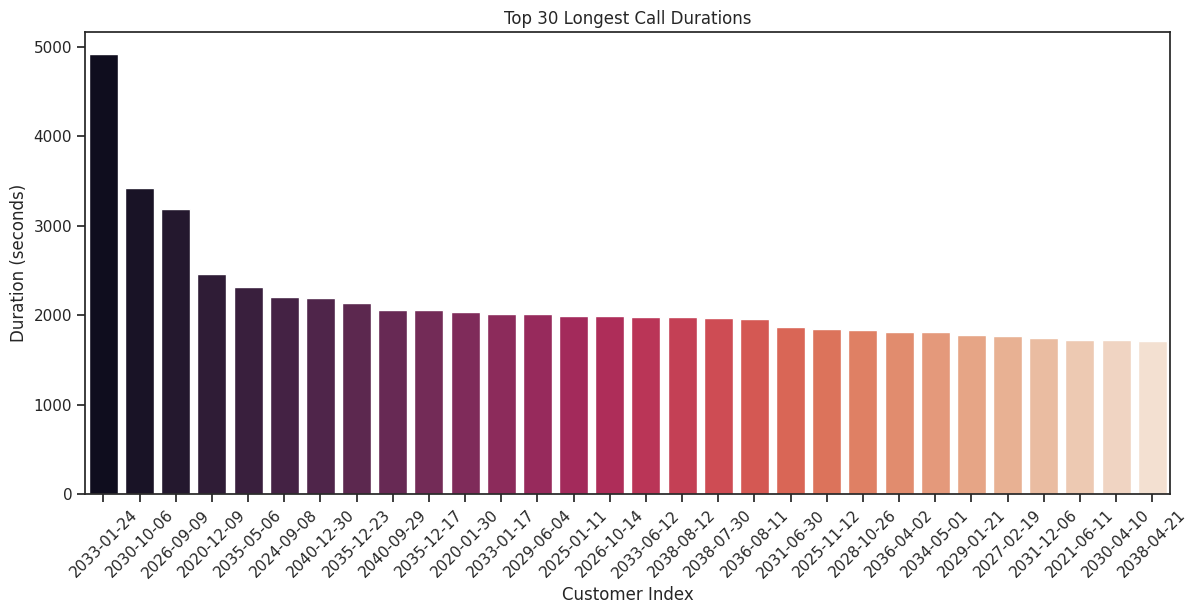

In [40]:
# 4. Top Values Visualization
print("\n\n" + "="*50)
print("Step 4: Top Values Analysis")
print("="*50)

top_30_duration = data.nlargest(30, 'duration')
plt.figure(figsize=(14, 6))
sns.barplot(x=top_30_duration.index, y='duration', data=top_30_duration, palette='rocket')
plt.title('Top 30 Longest Call Durations')
plt.xlabel('Customer Index')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.show()



Step 5: Comparative Visualizations


<ipython-input-41-4d63325cdb3f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='marital', y='age', data=data, palette='Set2')


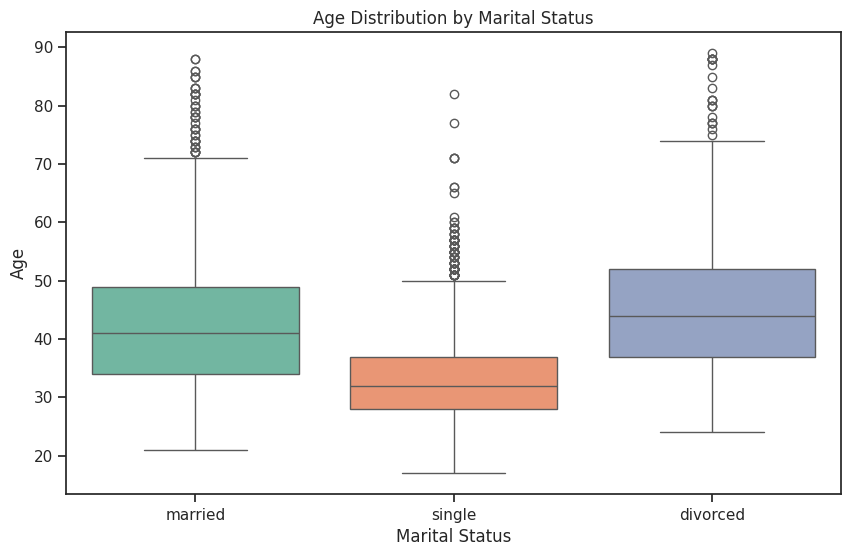

In [41]:
# 5. Box Plot and FacetGrid Visualizations
print("\n\n" + "="*50)
print("Step 5: Comparative Visualizations")
print("="*50)

# Box plot for Age vs Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='age', data=data, palette='Set2')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

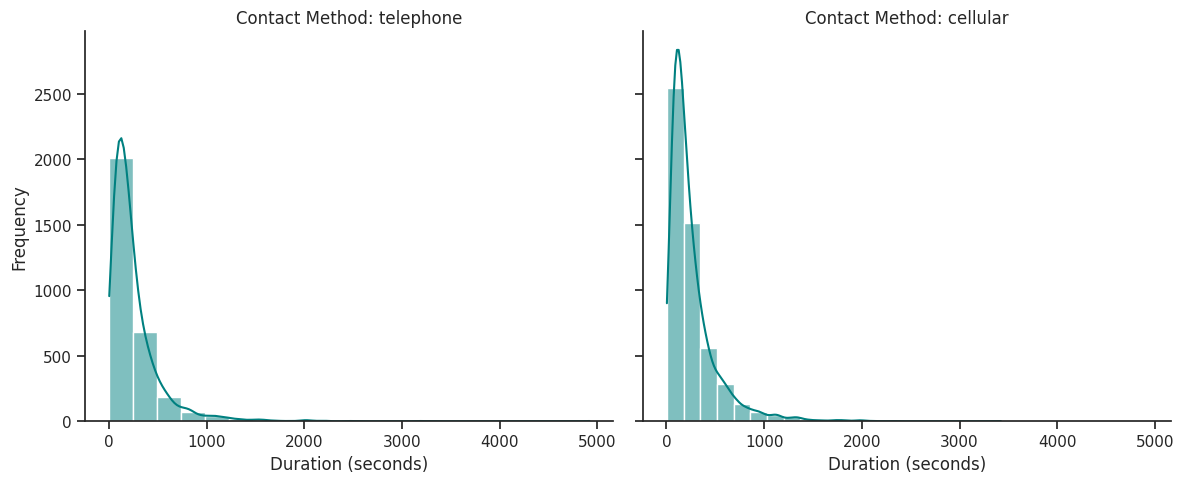

In [42]:
# FacetGrid for Duration Distribution by Contact Type
g = sns.FacetGrid(data, col='contact', height=5, aspect=1.2)
g.map(sns.histplot, 'duration', bins=20, kde=True, color='teal')
g.set_titles('Contact Method: {col_name}')
g.set_axis_labels('Duration (seconds)', 'Frequency')
plt.show()

# Bivariate Analysis
#Overview
This notebook section covers the detailed Bivariate Analysis of the dataset.

Step 1: Scatter Plots and Correlation Analysis


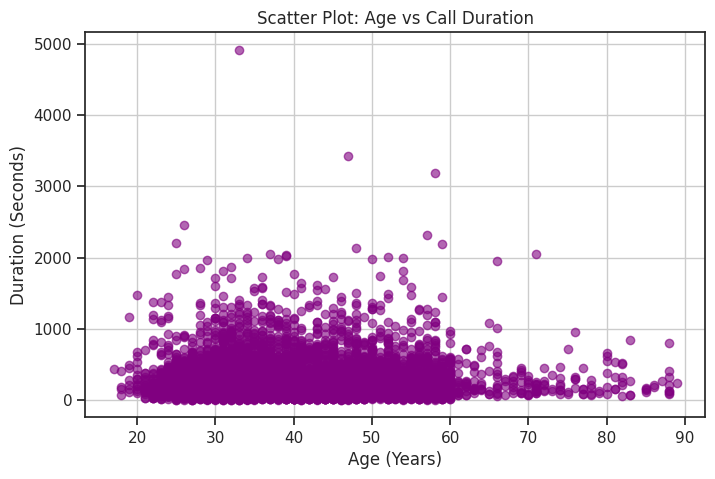

Correlation between 'age' and 'duration': -0.00
p-value: 8.94e-01


In [43]:
# 1. Scatter Plots and Correlation Analysis
print("="*50)
print("Step 1: Scatter Plots and Correlation Analysis")
print("="*50)

# Scatter plot for 'age' vs 'duration'
plt.figure(figsize=(8, 5))
plt.scatter(data['age'], data['duration'], color='purple', alpha=0.6)
plt.title('Scatter Plot: Age vs Call Duration')
plt.xlabel('Age (Years)')
plt.ylabel('Duration (Seconds)')
plt.grid(True)
plt.show()

# Calculate correlation between 'age' and 'duration'
corr_age_duration = stats.pearsonr(data['age'], data['duration'])
print(f"Correlation between 'age' and 'duration': {corr_age_duration[0]:.2f}")
print(f"p-value: {corr_age_duration[1]:.2e}")



Step 2: Box Plots for Categorical vs Numerical Variables


<ipython-input-44-d325b4eb5028>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='marital', y='duration', data=data, palette='Set2')


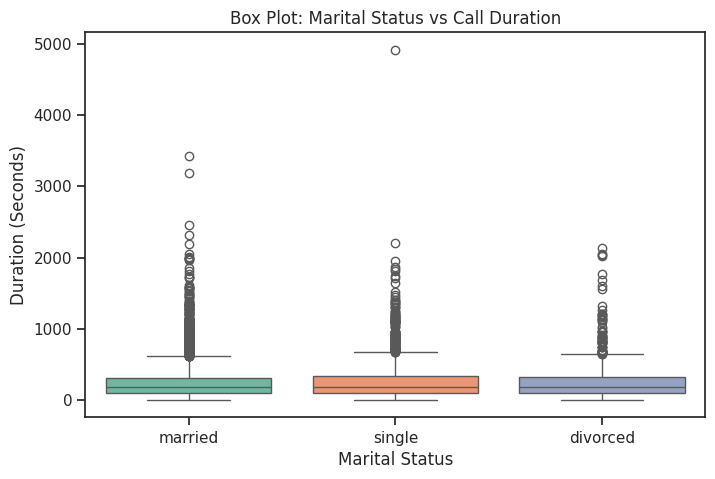

<ipython-input-44-d325b4eb5028>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='age', data=data, palette='viridis')


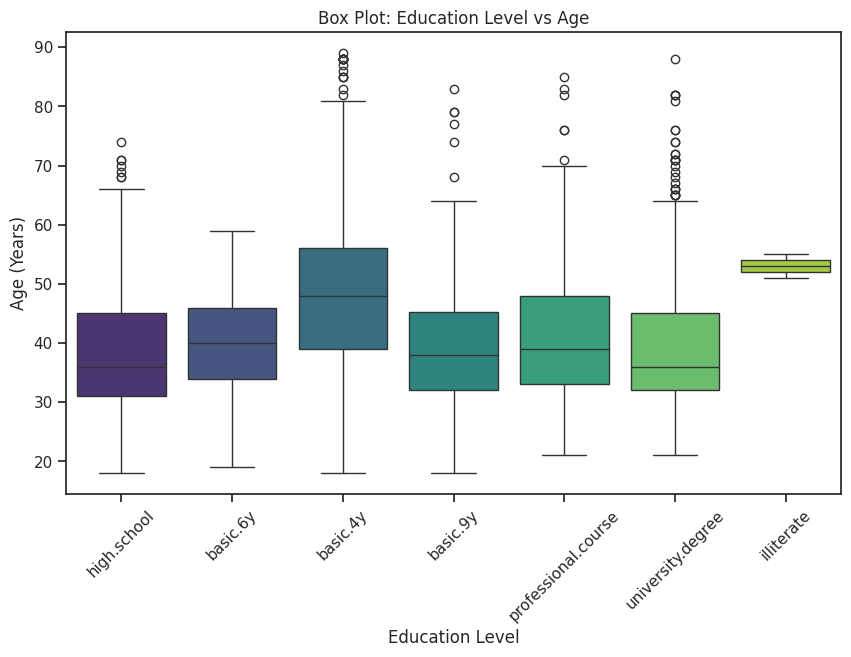

In [44]:
# 2. Box Plots for Categorical and Numerical Variables
print("\n\n" + "="*50)
print("Step 2: Box Plots for Categorical vs Numerical Variables")
print("="*50)

# Box plot for 'marital' (marital status) vs 'duration'
plt.figure(figsize=(8, 5))
sns.boxplot(x='marital', y='duration', data=data, palette='Set2')
plt.title('Box Plot: Marital Status vs Call Duration')
plt.xlabel('Marital Status')
plt.ylabel('Duration (Seconds)')
plt.show()

# Box plot for 'education' vs 'age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='age', data=data, palette='viridis')
plt.title('Box Plot: Education Level vs Age')
plt.xlabel('Education Level')
plt.ylabel('Age (Years)')
plt.xticks(rotation=45)
plt.show()




Step 3: Correlation Heatmap


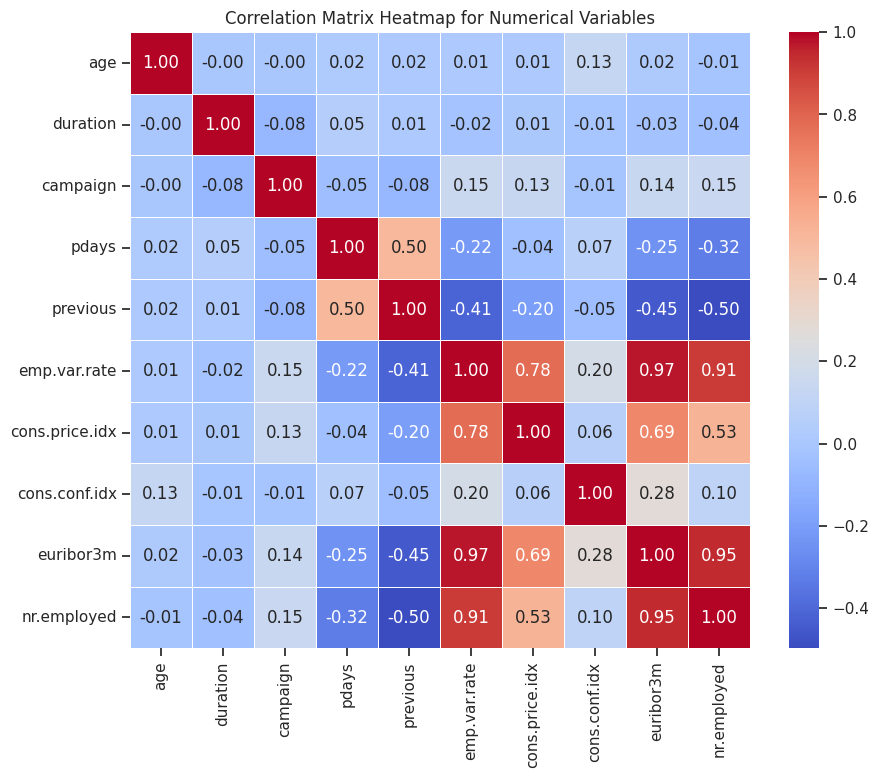

In [45]:
# 3. Heatmap for Correlation Analysis
print("\n\n" + "="*50)
print("Step 3: Correlation Heatmap")
print("="*50)

# Correlation matrix heatmap for numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
correlation_matrix = data[numerical_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap for Numerical Variables')
plt.show()

#Multivariate Analysis
#Overview
This notebook section covers the detailed Multivariate Analysis of the dataset.

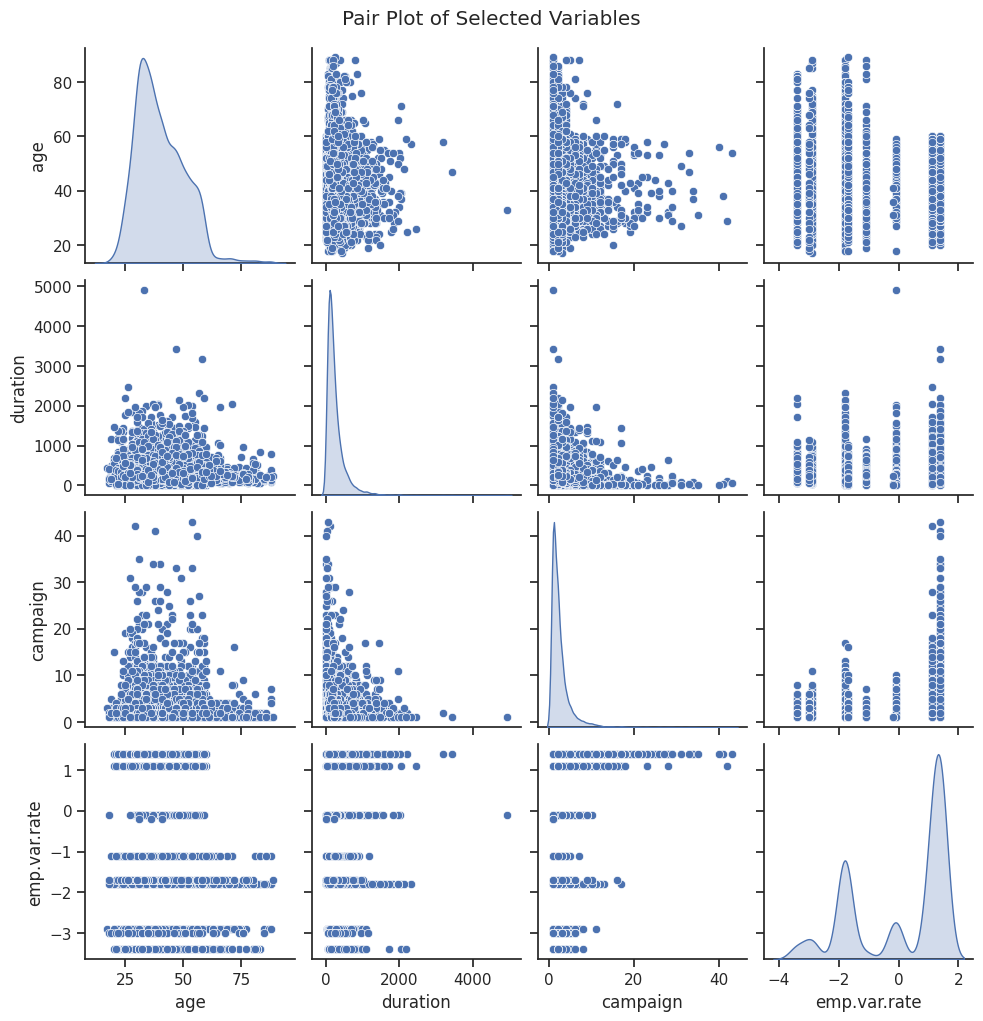

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pair Plot Analysis
# Pair plot for selected numerical variables from your dataset.
# Here we select: age, duration, campaign, and emp.var.rate.
sns.set(style='ticks', color_codes=True)
sns.pairplot(data[['age', 'duration', 'campaign', 'emp.var.rate']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

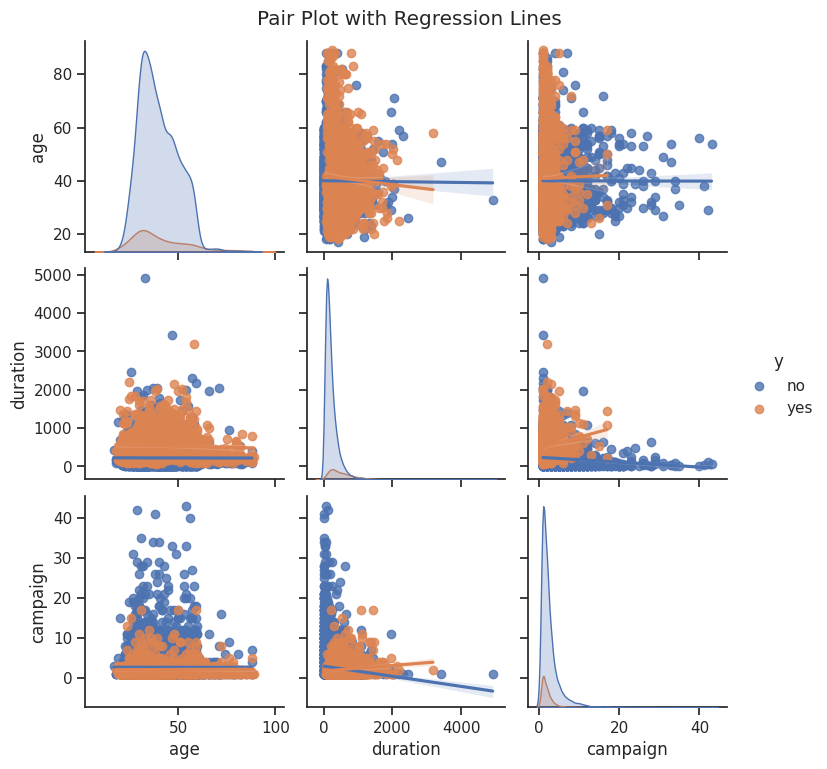

In [47]:
# 2. Pair Plot with Regression Lines
# Pair plot with regression lines using selected variables and using 'y' as the hue.
sns.pairplot(data, vars=['age', 'duration', 'campaign'], kind='reg', hue='y')
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()

In [48]:
# 3. Complete Correlation Analysis
# Calculating correlation for selected numerical columns.
# You can include as many numerical variables as needed.
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                  'euribor3m', 'nr.employed']
correlation_all = data[numerical_cols].corr(method='pearson')

# Display the correlation matrix
print(correlation_all)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.001467 -0.001498  0.024609  0.016054   
duration       -0.001467  1.000000 -0.076373  0.051207  0.014738   
campaign       -0.001498 -0.076373  1.000000 -0.048377 -0.080562   
pdays           0.024609  0.051207 -0.048377  1.000000  0.501301   
previous        0.016054  0.014738 -0.080562  0.501301  1.000000   
emp.var.rate    0.011922 -0.023372  0.151699 -0.215369 -0.413290   
cons.price.idx  0.013961  0.006441  0.134053 -0.040367 -0.198925   
cons.conf.idx   0.126139 -0.008544 -0.013207  0.066879 -0.048444   
euribor3m       0.021296 -0.028066  0.137072 -0.250058 -0.449454   
nr.employed    -0.012328 -0.038201  0.145885 -0.323140 -0.497512   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                 0.011922        0.013961       0.126139   0.021296   
duration           -0.023372        0.006441      -0.008544  -0.028066   
campaign            0.151699 

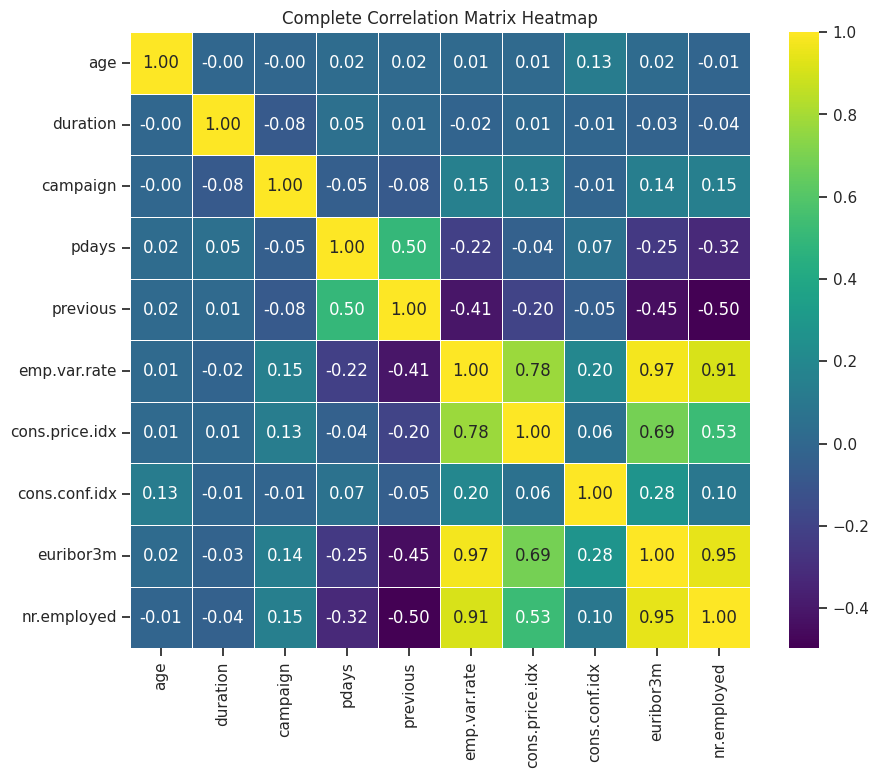

In [49]:
# Plotting heatmap for the complete correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f")
plt.title('Complete Correlation Matrix Heatmap')
plt.show()

#Time Series Analysis (Synthetic Time Index)
#Overview
This section covers Time Series Analysis (TSA) using a synthetic time index.

In [50]:
# 1. Creating a Synthetic Time Index
# For the purpose of time series analysis, we create a synthetic time index.
data['time_index'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')
data.set_index('time_index', inplace=True)

# Display the first few rows with the synthetic time index
print(data.head())

            age          job  marital    education default housing loan  \
time_index                                                                
2020-01-01   56     services  married  high.school      no      no  yes   
2020-01-02   41  blue-collar  married         <NA>      no      no   no   
2020-01-03   25     services   single  high.school      no     yes   no   
2020-01-04   35  blue-collar  married     basic.6y      no     yes   no   
2020-01-05   46  blue-collar  married     basic.6y      no     yes  yes   

              contact month day_of_week  ...  campaign  pdays  previous  \
time_index                               ...                              
2020-01-01  telephone   may         mon  ...         1      0         0   
2020-01-02  telephone   may         mon  ...         1      0         0   
2020-01-03  telephone   may         mon  ...         1      0         0   
2020-01-04  telephone   may         mon  ...         1      0         0   
2020-01-05  telephone   

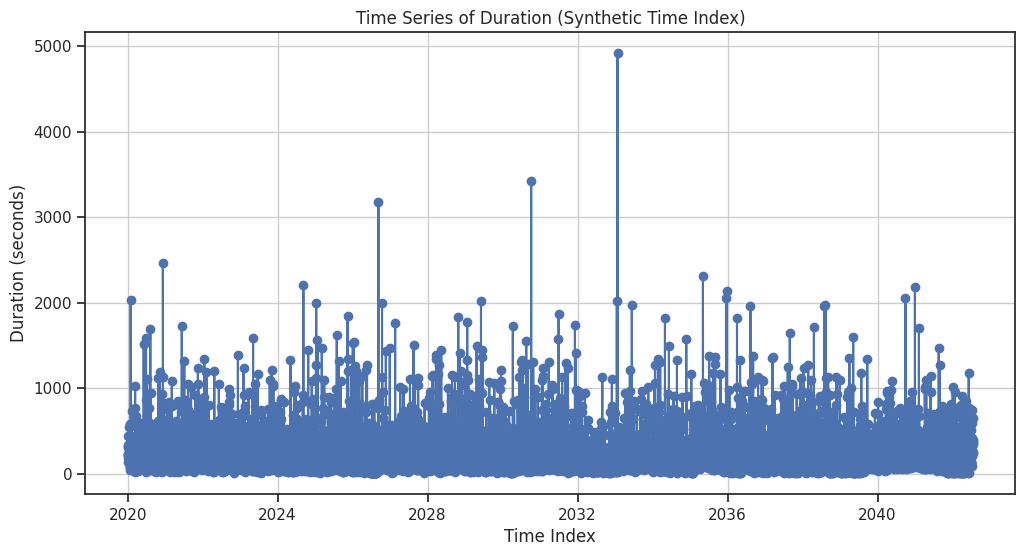

In [51]:
# 2. Basic Time Series Plot
# Plotting the time series for 'duration'
plt.figure(figsize=(12, 6))
plt.plot(data['duration'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Duration (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()

<ipython-input-52-9efdc39935fa>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_duration = data['duration'].resample('M').mean()


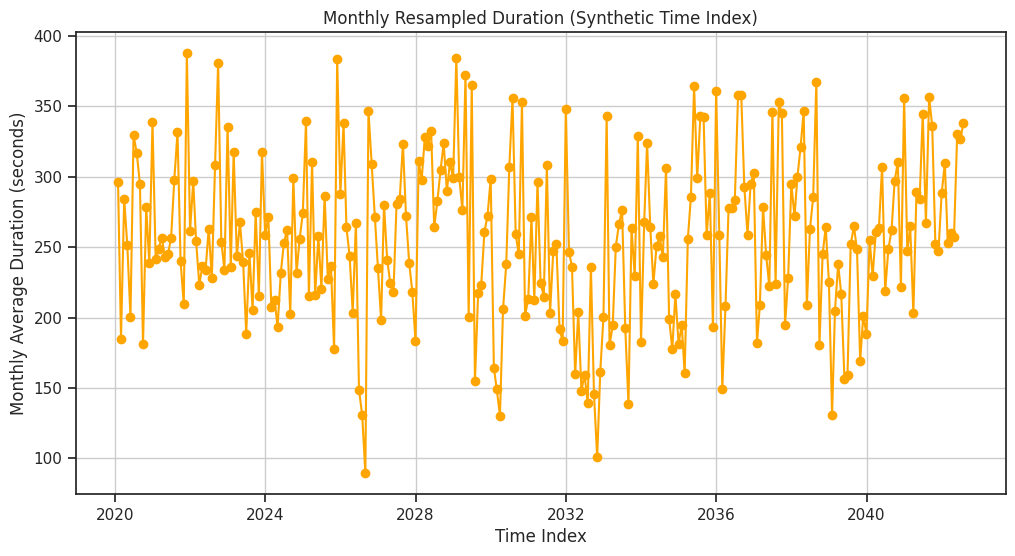

In [52]:
# 3. Resampling and Rolling Mean Analysis
# Resampling the data to a monthly frequency and calculating the mean duration
monthly_duration = data['duration'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_duration, marker='o', color='orange')
plt.title('Monthly Resampled Duration (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Monthly Average Duration (seconds)')
plt.grid(True)
plt.show()

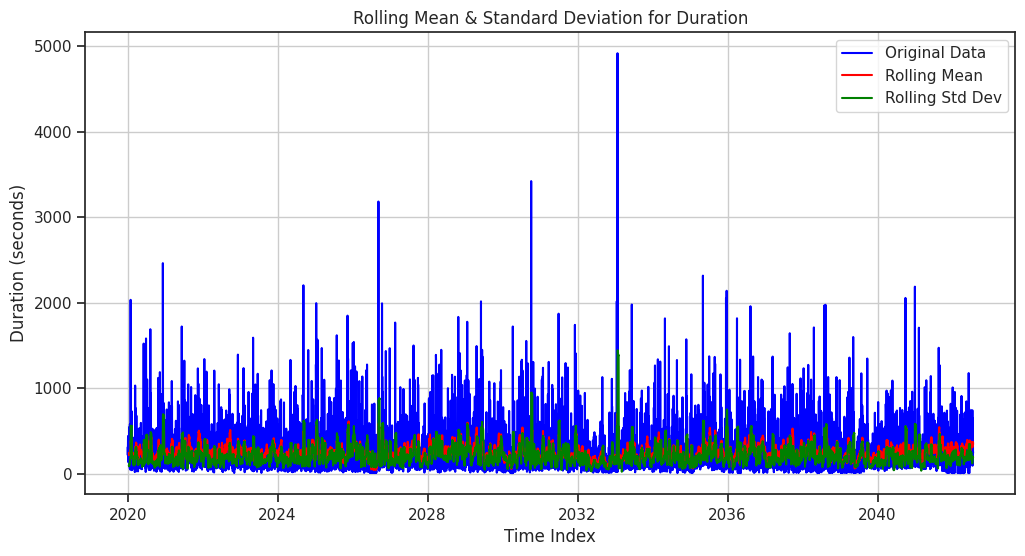

In [53]:
# 4. Rolling Statistics for Trend Analysis
# Calculating rolling mean and standard deviation (using a 12-day window)
rolling_mean = data['duration'].rolling(window=12).mean()
rolling_std = data['duration'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(data['duration'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean & Standard Deviation for Duration')
plt.xlabel('Time Index')
plt.ylabel('Duration (seconds)')
plt.legend()
plt.grid(True)
plt.show()

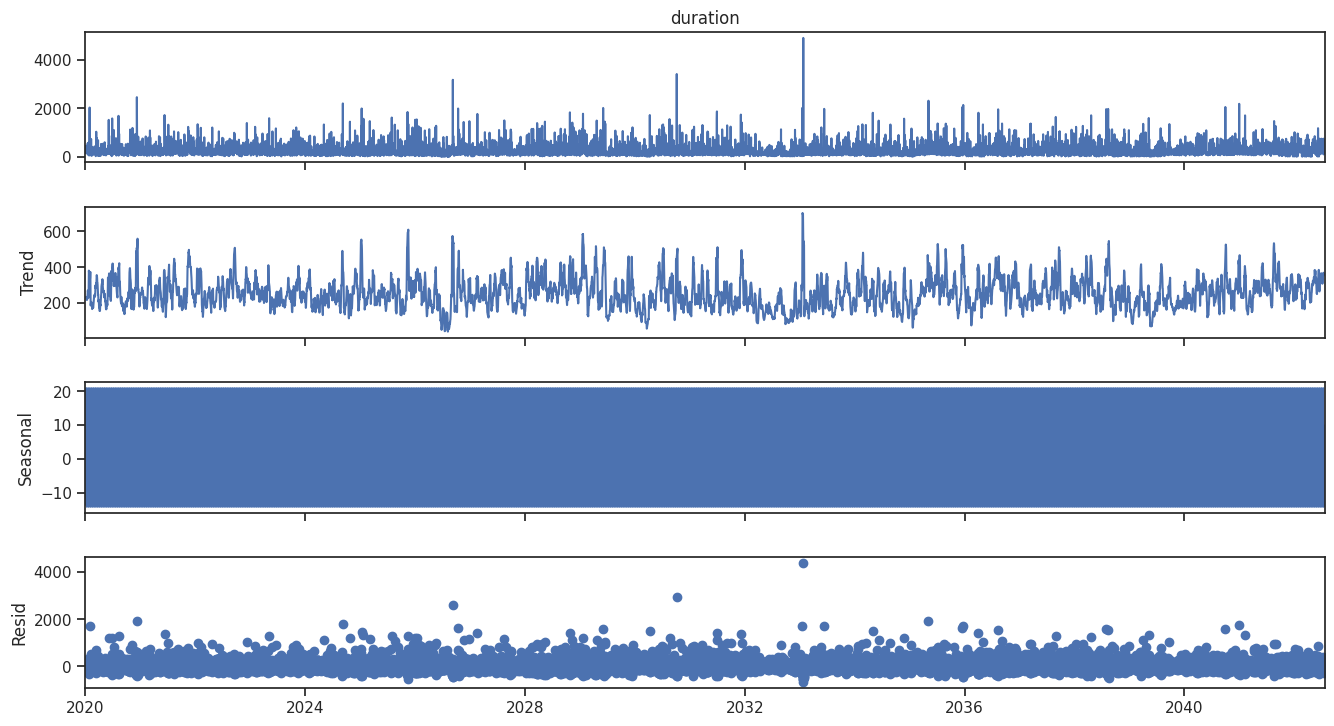

In [54]:
# 5. Seasonal Decomposition
# Decomposing the time series into trend, seasonal, and residual components.
# Here, period=12 assumes a seasonal cycle of 12 days; adjust this parameter based on your data.
decomposition = seasonal_decompose(data['duration'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

#Conclusion
This section presents a comprehensive Time Series Analysis using a synthetic time index, highlighting trends, seasonal patterns, and rolling statistics in the dataset. The analysis emphasizes the fluctuations in article publications over time, providing insights into publishing behavior and patterns.